In [1]:
import stan
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import nest_asyncio; nest_asyncio.apply()
import pandas as pd; pd.set_option("mode.chained_assignment", None)
from utils import select_columns, samples_to_df, df_to_samples, plot_ESS, plot_GR, plot_posterior

num_chains = 5
num_samples = 2000

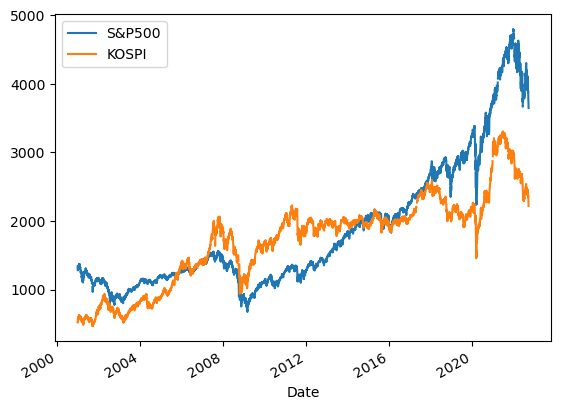

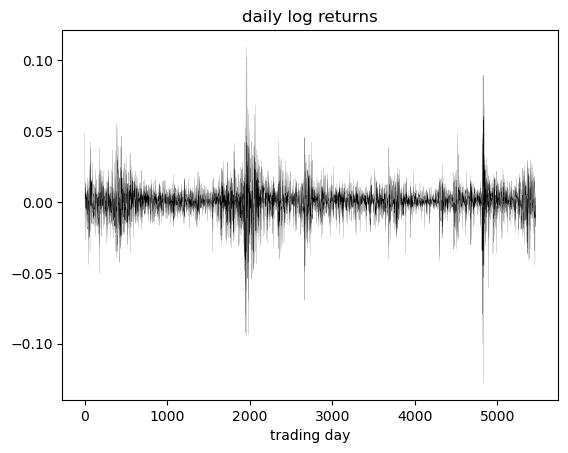

In [3]:
snp500 = pdr.get_data_yahoo("^GSPC", start="2001-01-01")["Close"]
kospi = pdr.get_data_yahoo("^KS11", start="2001-01-01")["Close"]
pd.DataFrame({"S&P500": snp500, "KOSPI": kospi}).plot()
plt.show()

r = np.log(snp500[1:].to_numpy() / snp500[:-1].to_numpy())
plt.plot(r, "k", lw=0.1)
plt.title("daily log returns")
plt.xlabel("trading day")
plt.show()

data = {"N": len(r), "r": r}

In [6]:
stochastic_volatility_snp500 = """
data {
    int<lower=1> N;  // Number of trading days
    vector[N] r;     // Daily log returns
}
parameters {
    real log_h_0;         // Volatility at time 0
    real r_loc;           // Average daily log returns
    vector[N] v;          // Random walk of volatility
    real<lower=0> sigma;  // Scale of random walk
}
transformed parameters {
    vector[N] log_h = log_h_0 + sigma * cumulative_sum(v);
    vector<lower=0>[N] sqrt_h = exp(log_h / 2);
}
model {
    // priors
    log_h_0 ~ normal(0, 1);
    sigma ~ lognormal(0, 1);
    v ~ normal(0, 1);
    r_loc ~ normal(0, 1e-2);

    // likelihood
    r ~ cauchy(r_loc * sqrt_h, sqrt_h);
}
"""

posterior_snp500 = stan.build(stochastic_volatility_snp500, data=data)
fit_snp500 = posterior_snp500.sample(num_chains=num_chains, num_samples=num_samples)
df_snp500 = fit_snp500.to_frame()
df_snp500.to_csv("result/stochastic_volatility_snp500.csv")


Building...



Building: found in cache, done.Messages from stanc:
Warning in '/tmp/httpstan_gu6nt0x4/model_pzovwm2k.stan', line 21, column 22: Argument
    1e-2 suggests there may be parameters that are not unit scale; consider
    rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:   0% (1/15000)
Sampling:   0% (2/15000)
Sampling:   0% (3/15000)
Sampling:   0% (4/15000)
Sampling:   0% (5/15000)
Sampling:   1% (104/15000)
Sampling:   1% (203/15000)
Sampling:   2% (302/15000)
Sampling:   3% (401/15000)
Sampling:   3% (500/15000)
Sampling:   4% (600/15000)
Sampling:   5% (700/15000)
Sampling:   5% (800/15000)
Sampling:   6% (900/15000)
Sampling:   7% (1000/15000)
Sampling:   7% (1100/15000)
Sampling:   8% (1200/15000)
Sampling:   9% (1300/15000)
Sampling:   9% (1400/15000)
Sampling:  10% (1500/15000)
Sampling:  11% (1600/15000)
Sampling:  11% (1700/15000)
Sampling:  12% (1800/15000)
Sampling:  13% (1900/15000)
Sampling:  13% (2000/15000)
Sampling:  14% (2100/15000)
Sampli